In [2]:
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
from plotnine import *

from sklearn.preprocessing import StandardScaler #Z-score variables

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

%matplotlib inline

# K Means

## 1. Explore

## 2. Build Model

In [3]:
bk = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/burger-king-items.txt",
                sep='\t')

bk.head()

,Item,Serving.size,Calories,Fat.Cal,Protein(g),Fat(g),Sat.Fat(g),Trans.fat(g),Chol(mg),Sodium(mg),Carbs(g),Fiber(g),Sugar(g),Meat,Breakfast,Not Breakfast,CarbsxMeat
0,Hamburger,109.0,260,90.0,13,10.0,4.0,0.0,35,490,28,1.0,6,1,0,1,28
1,Cheeseburger,121.0,300,130.0,16,14.0,6.0,0.0,45,710,28,1.0,6,1,0,1,28
2,Double_Hamburger,146.0,360,160.0,22,18.0,8.0,0.0,70,520,28,1.0,6,1,0,1,28
3,Double_Cheeseburger,171.0,450,230.0,26,26.0,12.0,1.0,95,960,29,1.0,6,1,0,1,29
4,Buck_Double,158.0,410,200.0,24,22.0,10.0,0.5,85,740,28,1.0,6,1,0,1,28


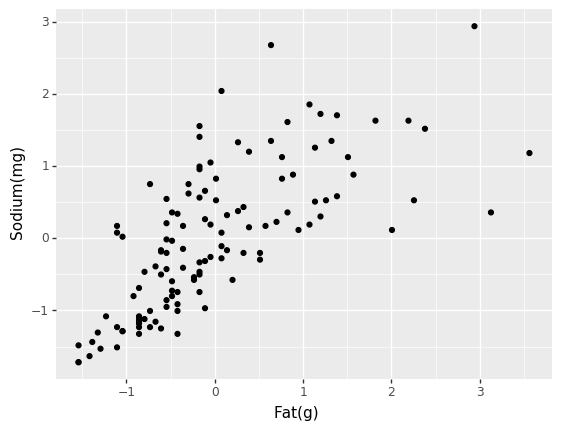

<ggplot: (305550330)>

In [4]:
features = ["Fat(g)", "Sodium(mg)"]
X = bk[features]

z = StandardScaler()
X[["Fat(g)", "Sodium(mg)"]] = z.fit_transform(X)

(ggplot(X, aes("Fat(g)", "Sodium(mg)")) + geom_point())

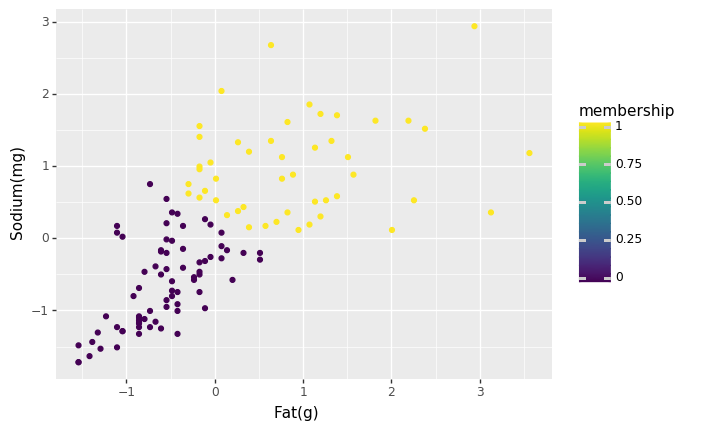

<ggplot: (305550294)>

In [5]:
km = KMeans(n_clusters = 2)
km.fit(X)

membership = km.predict(X)

X["cluster"] = membership

(ggplot(X, aes("Fat(g)", "Sodium(mg)", color = "membership")) + geom_point())

## 3. Evaluate Model

In [6]:
silhouette_score(X, membership)

0.5511252542124766

# Another Example

In [7]:
features = ["Fat(g)", "Sodium(mg)", "Calories", "Chol(mg)", "Sugar(g)", "Protein(g)"]
X = bk[features]

z = StandardScaler()
X[features] = z.fit_transform(X)

km = KMeans(n_clusters = 5)
km.fit(X)

membership = km.predict(X)

X["cluster"] = membership

silhouette_score(X, membership)

0.42129988315836003

# In Class

In [8]:
bc = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/BreastCancer.csv")

In [9]:
bc.head()
# a) radius (mean of distances from center to points on the perimeter)
# b) texture (standard deviation of gray-scale values)
# c) perimeter
# d) area
# e) smoothness (local variation in radius lengths)
# f) compactness (perimeter^2 / area - 1.0)
# g) concavity (severity of concave portions of the contour)
# h) concave points (number of concave portions of the contour)
# i) symmetry
# j) fractal dimension ("coastline approximation" - 1)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


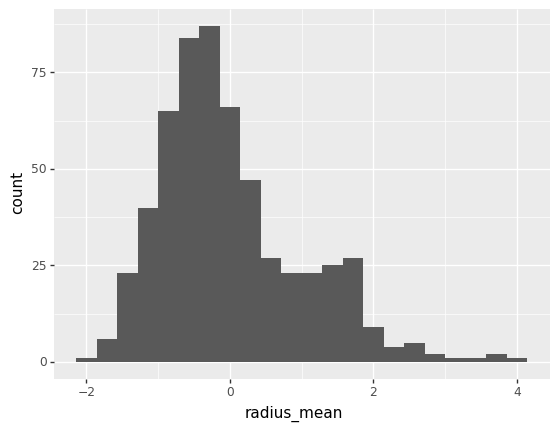

<ggplot: (307718894)>

In [13]:
features = ["radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean"]

X = bc[features]

z = StandardScaler()
X[features] = z.fit_transform(X[features])

(ggplot(X, aes("radius_mean")) + geom_histogram())

In [14]:
KM = KMeans(n_clusters = 3)

KM.fit(X)

membership = KM.predict(X)

In [17]:
XALL = X
XALL["clust"] = membership

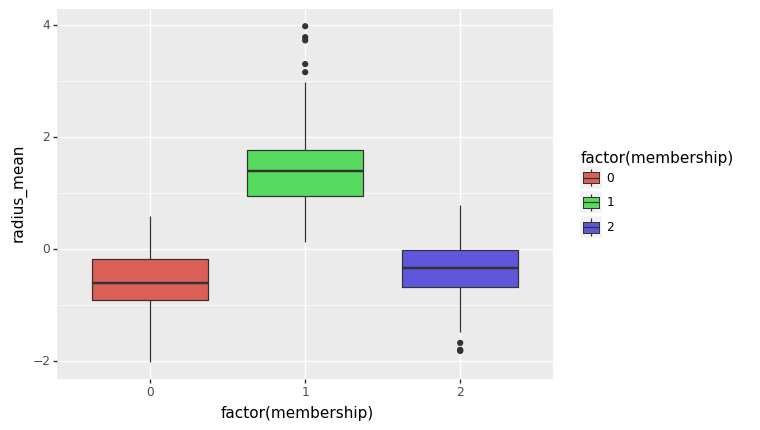

<ggplot: (305577783)>

In [19]:
(ggplot(XALL, aes(x = "factor(membership)", y = "radius_mean", fill = "factor(membership)")) + geom_boxplot())

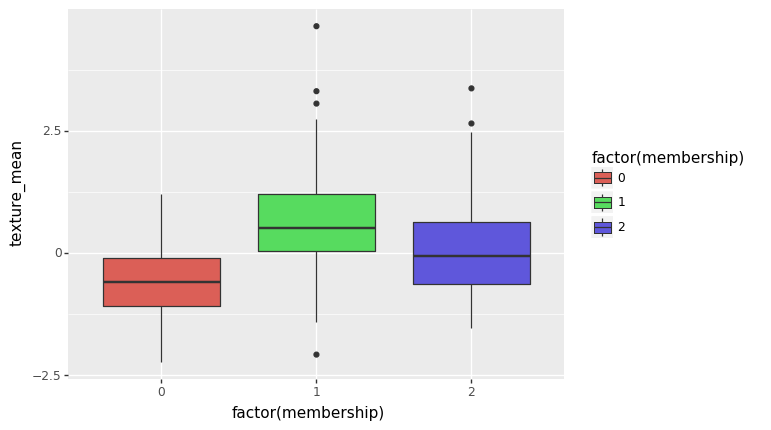

<ggplot: (308421497)>

In [20]:
(ggplot(XALL, aes(x = "factor(membership)", y = "texture_mean", fill = "factor(membership)")) + geom_boxplot())

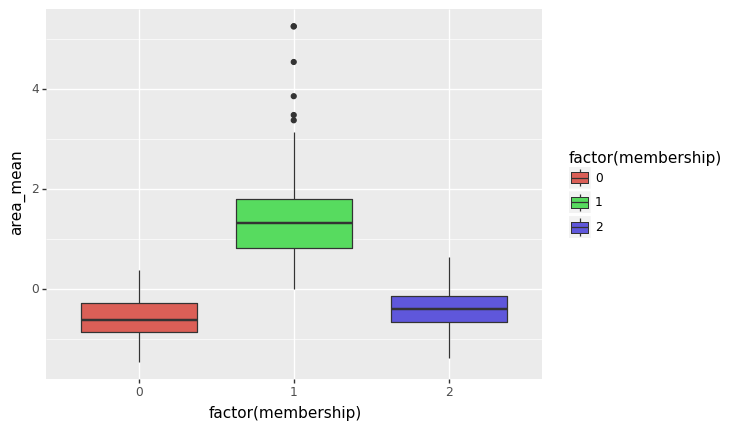

<ggplot: (308553250)>

In [21]:
(ggplot(XALL, aes(x = "factor(membership)", y = "area_mean", fill = "factor(membership)")) + geom_boxplot())

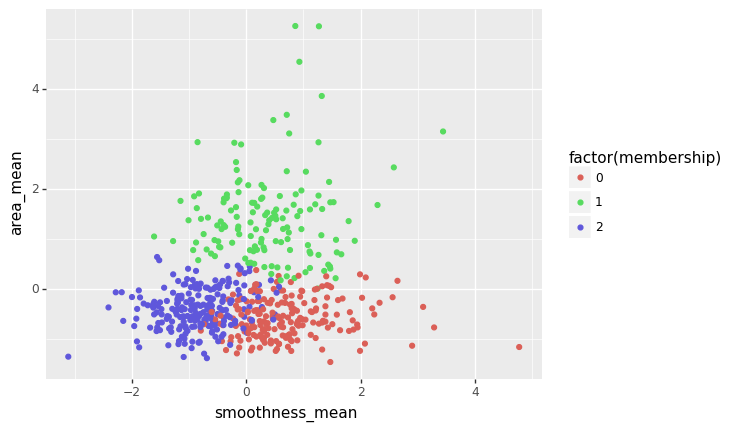

<ggplot: (308415853)>

In [23]:
(ggplot(XALL, aes(x = "smoothness_mean", y = "area_mean", color = "factor(membership)")) + geom_point())

In [22]:
silhouette_score(X, membership)

0.4237805677810328